In [1]:
import json
import os
import argparse
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import copy
from hyperparams import STRATEGY
from PLP.DSL import *
from strategy_demonstrations import make_modified_env
from decision_tree_imitation_learning import solve_mouselab
from scipy import stats
from datetime import datetime
import read_dataclips_to_dataframe as edf
import experiment_participant_analysis as epa
from importlib import reload

In [11]:
reload(edf)
reload(epa)
reload(plt)

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [12]:
COND0 = 0
COND1 = 1

pd.set_option('display.max_rows', 181)
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_colwidth', 60)

In [30]:
# import
with open('data/dataclipsExp3.json', 'r') as handle:
    data = json.load(handle)
    
df_valid_all = pd.read_csv('csv/Exp3/df_valid_all.csv')
df_valid = pd.read_csv('csv/Exp3/df_valid.csv')

In [ ]:
#print(edf.getMapping(data_dict, 45))
#edf.getParticipantInfoExp3(data_dict, 72)

In [14]:
#set up
plp_tree = eval('lambda st, act : ((among(st, act, lambda st, act:  not(is_leaf(st, act)) ,  lambda st, act, lst: has_best_path(st, act, lst) ) and among(st, act, lambda st, act:  not(is_max_in_branch(st, act))  and  not(is_observed(st, act)) ))) or ((not (among(st, act, lambda st, act:  not(is_leaf(st, act)) ,  lambda st, act, lst: has_best_path(st, act, lst) )) and among(st, act, lambda st, act:  is_max_in_branch(st, act)  and  not(is_observed(st, act)) )))')
data_dict = edf.json2dict(data)
dataframe = edf.makeDataframe(data_dict, edf.getParticipantInfoExp3)

Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 2 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 9 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 6 testing trials
Aborted Experiment: 3 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 0 testing trials
Aborted Experiment: 7 testing trials
A

In [ ]:
#dataframe[dataframe.WorkerId == '']

In [15]:
print(len(dataframe))
dataframe = dataframe.sort_values(by=['condition'], ascending=True)
dataframe.reset_index(inplace = True, drop=True)

258


In [8]:
# calculate dropout ratio:
print(len(dataframe[(dataframe.status == 6) & (dataframe.condition ==0)]))
print(len(dataframe[(dataframe.status == 6) & (dataframe.condition ==1)]))

45
54


In [ ]:
# look into special cases:
#dataframe[dataframe.WorkerId == "A27GK6AHDNFW5Y"].datastring.tolist()

In [ ]:
# ............................Filter.................................................
# .............................................................................
# .............................................................................

In [16]:
df_valid_all = dataframe[dataframe.status == 4]
df_valid_all.reset_index(inplace = True, drop=True)

In [11]:
results_info = epa.get_agreement_sample(df_valid_all.testingTrials.tolist(), plp_tree)

In [ ]:
#results_info

In [ ]:
df_valid_all['pair_agreements'] = results_info['click_agreement_ratios_sample']
df_valid_all['pair_agreement'] = results_info['click_agreement_means_sample']
df_valid_all['EA'] = results_info['mean_run_lengths_sample']

In [24]:
# filter dataframe
df_valid = df_valid_all[(df_valid_all.attempts_quiz < 4) & (df_valid_all.attempts_quiz2 < 4)]
print(len(df_valid_all))
print(len(df_valid))


149
119


In [ ]:
# ............................BONUS.................................................
# ..........................................................................................
# ..........................................................................................

In [ ]:
MAX_BONUS = 6
df_valid_all['bonus'] = 0.0

for index, row in df_valid_all.iterrows():
    if row['condition'] == 0:
        bonus = (0.1 * row['numberCorClicks']) - (0.1 * row['numberIncClicks'])
    else:
        bonus = 0.02 * np.sum(row['scores'])
    df_valid_all.at[index, 'bonus'] = min(max(bonus,0), MAX_BONUS)

In [ ]:
# bonus stats:
print(np.mean(df_valid_all['bonus']))
print(np.min(df_valid_all['bonus']))
print(np.max(df_valid_all['bonus']))

In [ ]:
# compute final bonus regarding min wage
delta_bonus, wage_ph, new_wage_ph = edf.getDeltaBonus(df_valid_all, 3, 5.5, max_bonus=MAX_BONUS)
plt.hist(new_wage_ph[df_valid_all.condition == 1].tolist())
np.sum(df_valid_all.bonus + delta_bonus)

In [ ]:
# compute total bonus
df_valid_all['delta_bonus'] = delta_bonus.tolist()
df_valid_all["total_bonus"] = df_valid_all['bonus'] + df_valid_all['delta_bonus']

In [ ]:
edf.exportBonus(df_valid_all, total_bonus = True)

In [ ]:
# ............................ Results .....................................................
# ..........................................................................................
# ..........................................................................................

In [2]:
df_valid_all = pd.read_csv('csv/Exp3/df_valid_all.csv')
df_valid = pd.read_csv('csv/Exp3/df_valid.csv')
df0 = df_valid[df_valid.condition == 0]
df1 = df_valid[df_valid.condition == 1]

In [5]:
print(stats.shapiro(df_valid.pair_agreement))
print(stats.fligner(df0.pair_agreement, df1.pair_agreement))

(0.9547252655029297, 0.0005191965028643608)
FlignerResult(statistic=10.85555192405656, pvalue=0.0009850000140806015)


In [40]:
epa.print_statistics(df0, df1, 'pair_agreement')

 -- df1 -- 
Median: 0.54
Mean: 0.5898
Std: 0.2444
($0.54\% \; (M= 0.5898\%, SD = 0.2444\%)$)

 -- df2 -- 
Median: 0.335
Mean: 0.3095
Std: 0.1592
($0.335\% \; (M= 0.3095\%, SD = 0.1592\%)$)



In [10]:
print(stats.shapiro(df_valid.total_rew_exp))
print(stats.fligner(df0.total_rew_exp, df1.total_rew_exp))

(0.9834502339363098, 0.1523924469947815)
FlignerResult(statistic=0.04734918614446447, pvalue=0.8277418119699131)


In [41]:
epa.print_statistics(df0, df1, 'total_rew_exp')

 -- df1 -- 
Median: 62.0
Mean: 59.5424
Std: 27.4815
($62.0\% \; (M= 59.5424\%, SD = 27.4815\%)$)

 -- df2 -- 
Median: 40.0
Mean: 41.7167
Std: 26.2559
($40.0\% \; (M= 41.7167\%, SD = 26.2559\%)$)



In [42]:
print(6.2/9.33)
print(4.0/9.33)

0.6645230439442659
0.4287245444801715


In [9]:
print(len(df0[df0.pair_agreement > 0.8])/len(df0))
print(len(df1[df1.pair_agreement > 0.8])/len(df1))

0.2542372881355932
0.0


In [12]:
# ............................ Stats .....................................................
# ..........................................................................................
# ..........................................................................................

In [13]:
#df_valid_all[df_valid_all.condition == 0].qUnd.tolist()
#df_valid_all[df_valid_all.condition == 0].qConf.tolist()
#df_valid_all[df_valid_all.condition == 0].qNotUnd.tolist()
#df_valid_all[df_valid_all.condition == 0].feedback.tolist()

In [14]:
#df_valid

50.66904761904762


(array([ 7.,  9.,  9., 11., 11.,  9., 10.,  6.,  1.,  4.]),
 array([24.5  , 30.577, 36.653, 42.73 , 48.807, 54.883, 60.96 , 67.037, 73.113, 79.19 , 85.267]),
 <a list of 10 Patch objects>)

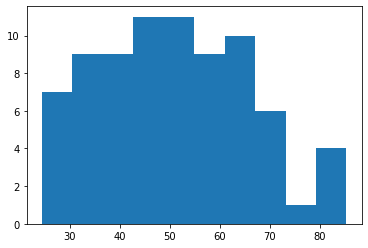

In [15]:
# calculate mean time 
tt = [int(a)/60 for a in df_valid_all[df_valid_all.condition == 0]['totalTime'].to_list() if a != '-']
print(np.mean(tt))
plt.hist(tt)

In [16]:
# calculate mean time for mouselba trials:
df_valid[df_valid.condition == 0].trialTimeMean.mean()

114.96779661016951

In [17]:
# calculate mean age:
# typos
age_temp = df_valid_all[df_valid_all.age != '-' ].age.astype(int)

print( np.mean( age_temp ) )
print( np.min( age_temp ) )
print( np.max( age_temp ) )

33.66442953020134
18
65


/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [18]:
# calculate gender:
gender_temp = df_valid_all[ df_valid_all.gender != '-'].gender.str.lower().str.contains("f")
print(np.sum(gender_temp))

62


In [19]:
#number excluded 
len(df_valid_all) - len(df_valid)

30

In [20]:
1 - len(df_valid)/len(df_valid_all)

0.20134228187919467

In [22]:
#number valid
print(len(df_valid[ df_valid.condition == 0]))
print(len(df_valid[ df_valid.condition == 1]))

59
60


In [23]:
# stats attempts
print(df_valid_all.attempts_quiz2.min())
print(df_valid_all.attempts_quiz2.max())
print(df_valid_all.attempts_quiz2.mean())

1
10
1.9597315436241611


In [24]:
np.mean(df_valid_all.attempts_quiz + df_valid_all.attempts_quiz2)

4.0

In [25]:
# stats genEdu
df_valid_all.groupby('genEdu')['WorkerId'].nunique()

genEdu
College degree          123
High school graduate     26
Name: WorkerId, dtype: int64

In [26]:
# stats comEdu
df_valid_all.groupby('comEdu')['WorkerId'].nunique()

comEdu
No     67
Yes    82
Name: WorkerId, dtype: int64

In [27]:
# ............................ Plots .....................................................
# ..........................................................................................
# ..........................................................................................

[0.1, 0.30000000000000004, 0.5, 0.7, 0.9]


Text(0, 0.5, 'Proportion of participants')

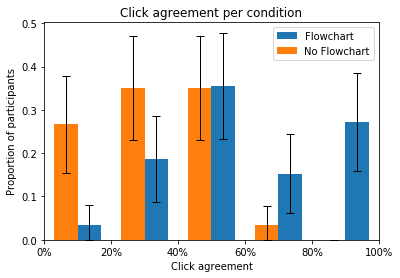

In [28]:
epa.create_barplot(df0, df1, 'pair_agreement', [0 , 0.2, 0.4, 0.6, 0.8, 1])
plt.legend()
plt.xticks([0., 0.2, 0.4,  0.6,  0.8,  1], labels=['0%', '20%','40%', '60%', '80%','100%'])
plt.title('Click agreement per condition')
plt.xlabel('Click agreement')
plt.ylabel('Proportion of participants')
#plt.savefig('plots/exp3_ca.png', dpi=300)

In [29]:
#max(df_valid.mean_rew) #-13.5, 12.7 

[-12.0, -6.0, 0.0, 6.0, 12.0]


Text(0, 0.5, 'Proportion of participants')

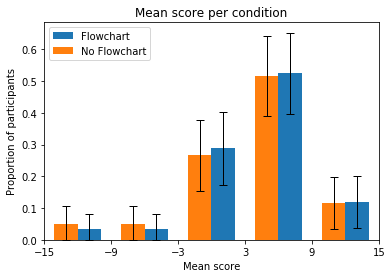

In [30]:
epa.create_barplot(df0, df1, 'mean_rew', [-15., -9.,   -3,  3,  9,  15])
plt.legend()
plt.title('Mean score per condition')
plt.xlabel('Mean score')
plt.ylabel('Proportion of participants')
#plt.savefig('plots/exp3_mr.png', dpi=300)

In [31]:
#min(df_valid.mean_rew_exp) #-3, 11 

[-1.5, 1.5, 4.5, 7.5, 10.5]


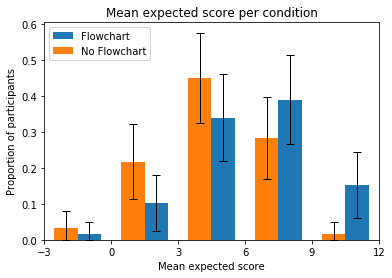

In [32]:
epa.create_barplot(df0, df1, 'mean_rew_exp', [-3, 0,   3,  6,  9,  12])
plt.legend()
plt.title('Mean expected score per condition')
plt.xlabel('Mean expected score')
plt.ylabel('Proportion of participants')
plt.savefig('plots/exp3_emr.png', dpi=300)

In [33]:
# ............................ Stroring .....................................................
# ..........................................................................................
# ..........................................................................................

In [34]:
#df_valid_all.to_csv('csv/Exp3/df_valid_all.csv')
#df_valid.to_csv('csv/Exp3/df_valid.csv')